In [1]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import time
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, learning_curve
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score


In [2]:
def clean_email(text: str) -> str:
    text = re.sub(r'<[^>]+>', '', text) # remove HTML tags
    text = re.sub(r'http\S+', '', text) # remove URLs
    # TODO: add a count of URLs to email data
    text = re.sub(r'\d+', '', text) # remove numerical text
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    text = text.lower().strip() # lowercase
    return text

def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    """
    """
    df['clean_email'] = df['body'].astype(str).apply(clean_email)
    return df

In [3]:
df = pd.read_csv('../../data/analysis/emails_augmented.csv') 
assert 'body' in df.columns and 'label' in df.columns, "Missing required columns."
df = preprocess(df)
X = df['clean_email']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
LogisticRegression_pipeline = joblib.load('../../output/models/LogisticRegression.joblib')
MLPClassifier_pipeline = joblib.load('../../output/models/MLPClassifier.joblib')
MultinomialNB_pipeline = joblib.load('../../output/models/MultinomialNB.joblib')
RandomForest_pipeline = joblib.load('../../output/models/RandomForest.joblib')

/projectnb/rise-phishing/andrewhl/.conda/envs/phishfenceSHAP/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/projectnb/rise-phishing/andrewhl/.conda/envs/phishfenceSHAP/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/projectnb/rise-phishing/andrewhl/.conda/envs/phishfenceSHAP/lib/python3.13/site-packages/sklearn/base.py:442: 

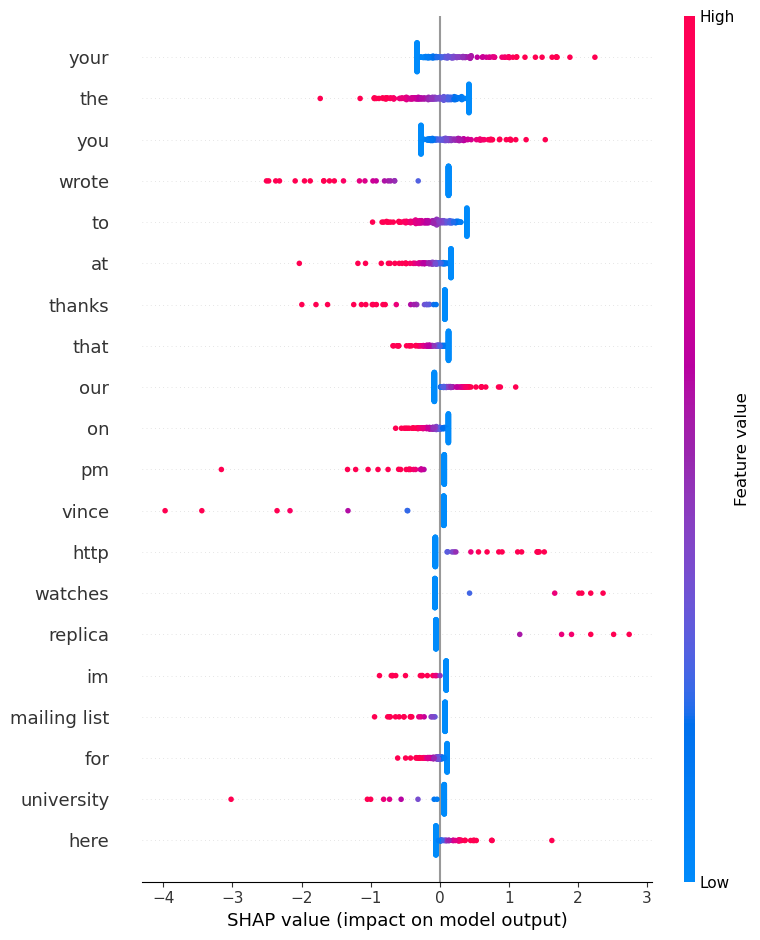

In [ ]:
import shap

vectorizer = LogisticRegression_pipeline.named_steps['vectorizer']
classifier = LogisticRegression_pipeline.named_steps['classifier']

X_train_vec = vectorizer.transform(X_train).toarray()
explainer = shap.Explainer(classifier, X_train_vec)
sample_texts = X_train.iloc[idx]
sample_vec = vectorizer.transform(sample_texts).toarray()

# 5. SHAP values & plot
shap_values = explainer(sample_vec)
feature_names = vectorizer.get_feature_names_out()
shap.summary_plot(shap_values.values, features=sample_vec, feature_names=feature_names, plot_type="bar")

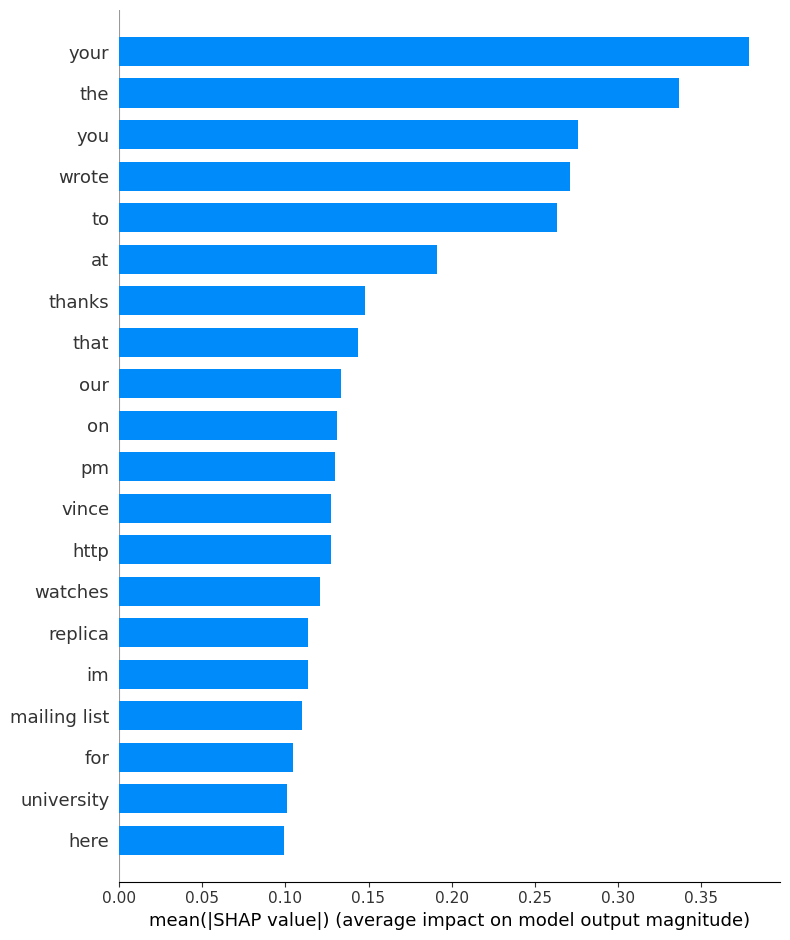

In [7]:
shap.summary_plot(shap_values.values, features=sample_vec, feature_names=feature_names, plot_type="bar")

In [8]:
shap.plots.waterfall(shap_values[0], feature_names=feature_names)

TypeError: waterfall() got an unexpected keyword argument 'feature_names'